In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [6]:
path=os.getcwd() +'/data/ex1data2.txt'
data=pd.read_csv(path,header=None,names=['Size', 'Bedrooms', 'Price'])
data.head()


,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


In [7]:
data.describe()

,Size,Bedrooms,Price
count,47.000000,47.000000,47.000000
mean,2000.680851,3.170213,340412.659574
std,794.702354,0.760982,125039.899586
min,852.000000,1.000000,169900.000000
25%,1432.000000,3.000000,249900.000000
50%,1888.000000,3.000000,299900.000000
75%,2269.000000,4.000000,384450.000000
max,4478.000000,5.000000,699900.000000


In [8]:
x = data[['Size','Bedrooms']]
y = data['Price']

In [11]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2)

In [12]:
reg = LinearRegression()
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
df_coef = pd.DataFrame(reg.coef_,index =x.columns,columns = ['Coeff'])

In [17]:
df_coef.head()

,Coeff
Size,139.281414
Bedrooms,159.885347


In [18]:
y_pred = reg.predict(x_test)

In [19]:
df = pd.DataFrame.from_dict({'Actual':y_test,'predicted':y_pred})
df.head()

,Actual,predicted
17,199900,236007.627137
38,549000,651086.845384
33,579900,500781.595530
1,329900,286706.061905
36,229900,236425.471379


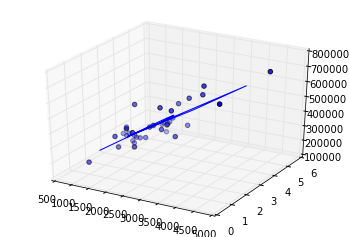

In [42]:
#plt.scatter(x_train, y_train,  color='black')
#plt.plot(x_test,y_pred, color='blue', linewidth=3)
from mpl_toolkits.mplot3d import Axes3D
x2=np.linspace(data.Bedrooms.min(),data.Bedrooms.max(),47)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_test.Size,x_test.Bedrooms,zs = np.array(y_pred).ravel())
ax.scatter(x_train.Size,x_train.Bedrooms,y_train)
